In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset


In [2]:
df = pd.read_csv('wine_data.csv')

###1. What is the most frequently occurring wine quality? What is the highest number in and the lowest number in the quantity column?

In [3]:
most_frequent_quality = df['quality'].mode()[0]
highest_quality = df['quality'].max()
lowest_quality = df['quality'].min()

print("The most frequently occurring wine quality is:", most_frequent_quality)
print("Highest number in the quality column: ", highest_quality)
print("Lowest number in the quality column: ", lowest_quality)

The most frequently occurring wine quality is: 5
Highest number in the quality column:  8
Lowest number in the quality column:  3


###2. How is `fixed acidity` correlated to the quality of the wine? How does the alcohol content affect the quality? How is the `free Sulphur dioxide` content correlated to the quality of the wine?

Correlation between fixed acidity and quality: 0.12405164911322428
Correlation between alcohol and quality: 0.4761663239995365
Correlation between free sulfur dioxide and quality: -0.0506560572442763


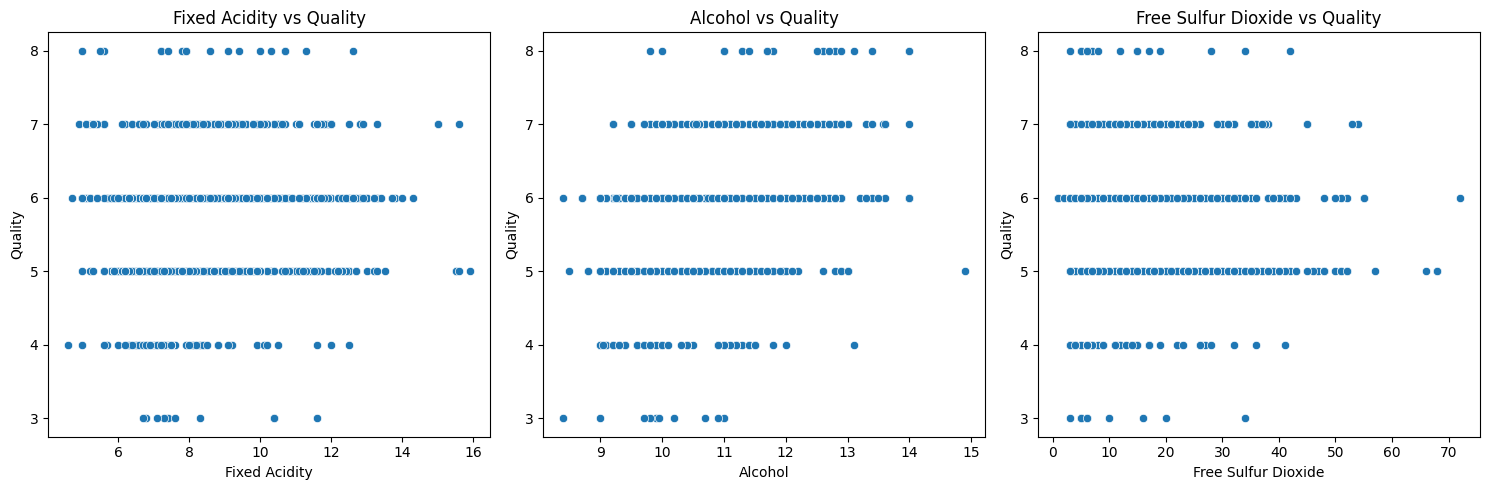

In [4]:
# Calculating correlation coefficient
acid_quality_corr = df['fixed acidity'].corr(df['quality'])
alcohol_quality_corr = df['alcohol'].corr(df['quality'])
sulphur_quality_corr = df['free sulfur dioxide'].corr(df['quality'])

print("Correlation between fixed acidity and quality:", acid_quality_corr)
print("Correlation between alcohol and quality:", alcohol_quality_corr)
print("Correlation between free sulfur dioxide and quality:", sulphur_quality_corr)

# Plotting all three scatter plots in one pane
plt.figure(figsize=(15, 5))

# Scatter plot for fixed acidity vs quality
plt.subplot(1, 3, 1)
sns.scatterplot(x=df['fixed acidity'], y=df['quality'])
plt.title('Fixed Acidity vs Quality')
plt.xlabel('Fixed Acidity')
plt.ylabel('Quality')

# Scatter plot for alcohol vs quality
plt.subplot(1, 3, 2)
sns.scatterplot(x=df['alcohol'], y=df['quality'])
plt.title('Alcohol vs Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')

# Scatter plot for free sulfur dioxide vs quality
plt.subplot(1, 3, 3)
sns.scatterplot(x=df['free sulfur dioxide'], y=df['quality'])
plt.title('Free Sulfur Dioxide vs Quality')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Quality')

plt.tight_layout()
plt.show()

###3.What is the average `residual sugar` for the best quality wine and the lowest quality wine in the dataset?

In [5]:
best_quality = df['quality'].max()
lowest_quality = df['quality'].min()

best_quality_sugar = df[df['quality'] == best_quality]['residual sugar'].mean()
lowest_quality_sugar = df[df['quality'] == lowest_quality]['residual sugar'].mean()

print("Best and lowest quality wine: ", best_quality, ",", lowest_quality, "respectively")

print(f"Average residual sugar for best quality wine: {best_quality_sugar:.2f}")
print(f"Average residual sugar for lowest quality wine: {lowest_quality_sugar:.2f}")

Best and lowest quality wine:  8 , 3 respectively
Average residual sugar for best quality wine: 2.58
Average residual sugar for lowest quality wine: 2.64


###4. Does `volatile acidity` has an effect over the quality of the wine samples in the dataset?

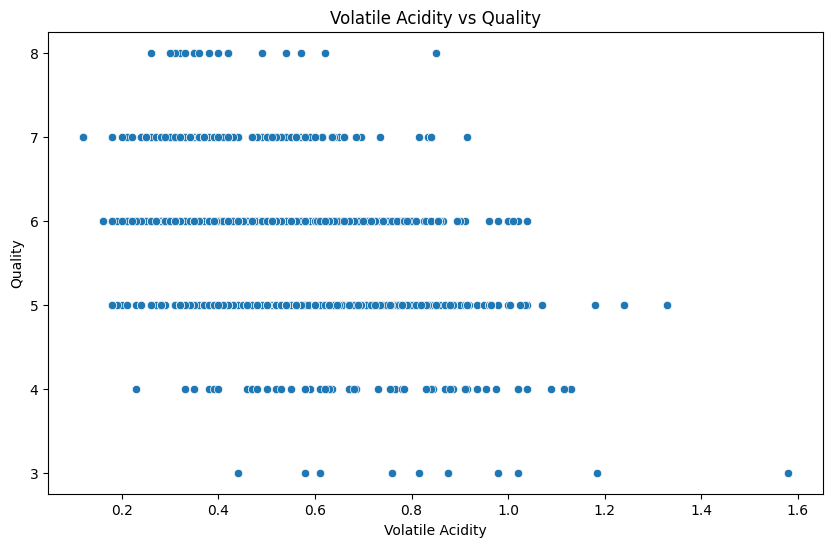

Correlation between volatile acidity and quality: -0.39


In [6]:
# Calculating the correlation factors and plotting sca scatter plot
volatile_acidity_quality_corr = df['volatile acidity'].corr(df['quality'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['volatile acidity'], y=df['quality'])
plt.title('Volatile Acidity vs Quality')
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.show()

print(f"Correlation between volatile acidity and quality: {volatile_acidity_quality_corr:.2f}")

###5. Train a Decision Tree model and Random Forest Model separately to predict the quality of the given samples of wine. Compare the Accuracy scores for both models

##Decision Tree model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df.drop('quality', axis=1)
y = df['quality']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating a Decision Tree Classifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# Training the model
classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = classifier.predict(X_test)

# Testing
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[5 6]
 [5 5]
 [7 7]
 [5 6]
 [5 5]
 [6 6]
 [6 5]
 [6 6]
 [4 4]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [6 5]
 [6 6]
 [7 6]
 [7 7]
 [5 5]
 [5 5]
 [6 4]
 [7 7]
 [6 6]
 [6 6]
 [7 4]
 [6 6]
 [4 5]
 [5 5]
 [6 7]
 [5 5]
 [7 6]
 [6 5]
 [7 6]
 [6 5]
 [6 6]
 [7 7]
 [7 7]
 [6 5]
 [6 6]
 [6 6]
 [6 7]
 [6 5]
 [6 7]
 [6 6]
 [7 6]
 [6 5]
 [6 5]
 [5 6]
 [6 6]
 [5 6]
 [6 5]
 [5 5]
 [4 5]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [7 6]
 [6 5]
 [5 5]
 [6 6]
 [6 6]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [5 6]
 [6 6]
 [4 4]
 [5 6]
 [6 5]
 [5 6]
 [5 5]
 [5 5]
 [5 5]
 [7 6]
 [6 6]
 [5 5]
 [6 6]
 [5 6]
 [6 6]
 [6 5]
 [7 6]
 [5 5]
 [7 5]
 [5 5]
 [5 5]
 [6 6]
 [6 4]
 [6 5]
 [5 7]
 [5 6]
 [7 6]
 [5 5]
 [5 6]
 [5 5]
 [7 8]
 [6 6]
 [5 6]
 [7 6]
 [6 5]
 [6 5]
 [6 5]
 [5 5]
 [6 7]
 [5 5]
 [6 6]
 [5 5]
 [8 7]
 [5 5]
 [6 6]
 [6 6]
 [7 6]
 [7 7]
 [7 6]
 [6 6]
 [5 5]
 [6 7]
 [6 5]
 [5 5]
 [8 6]
 [7 6]
 [5 5]
 [5 5]
 [6 5]
 [6 6]
 [6 6]
 [5 6]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [7 8]
 [5 5]
 [6 6]
 [5 5]
 [5 6]

###Confusion Matrix and Accuracy of the model


In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Model Accuracy:", (accuracy *100), "%")

[[ 0  0  1  1  0  0]
 [ 0  3  3  3  2  0]
 [ 0  4 95 29  6  1]
 [ 0  0 29 92 20  1]
 [ 0  0  2  9 13  3]
 [ 0  0  0  1  2  0]]
Decision Tree Model Accuracy: 63.4375 %


##Random Forest Model

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Creating a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)

# Training the model
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

###Confusion matrix and Accuracy of the model


In [10]:
# Confusion Matrix and Accuracy of the model
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Model Accuracy:", (accuracy_rf * 100), "%")


[[  0   0   1   1   0   0]
 [  0   0   7   4   0   0]
 [  0   0 112  20   3   0]
 [  0   0  40  87  15   0]
 [  0   0   1  11  15   0]
 [  0   0   0   0   3   0]]
Random Forest Model Accuracy: 66.875 %
